# Random Forest Classifier For Time Series

## Dependencies and Defaults

In [43]:
import subscript.config as cn
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns

## Read in the clean time series dataset

In [44]:
df = pd.read_csv(os.path.join(cn.clean_dir,'random_forest_time',
        'final_time_stats.csv'),dtype = 'unicode')
df = df.drop_duplicates()
df = df.fillna(0)



In [45]:
del_cols = [c for c in df.columns.values if 'unnamed' in c.lower()]
df = df.drop(del_cols, axis = 1)

In [46]:

recent_cols = [c for c in df.columns.values if '2018' in c 
               or '2019' in c
               or '2020' in c
               or 'engagement' in c 
               or 'gear_score' in c
              or 'time_since_login' in c]
df_orig = df.copy()
df = df[recent_cols]

In [47]:
df['2020-05'].head()

0    13
1    13
2    12
3    12
4    12
Name: 2020-05, dtype: object

In [48]:

no_xform = ['player', 'realm', 'last_login', 
            'time_since_login','engagement', 'status']

X = df.drop(['engagement', 'time_since_login'], axis = 1)
y = df.engagement 

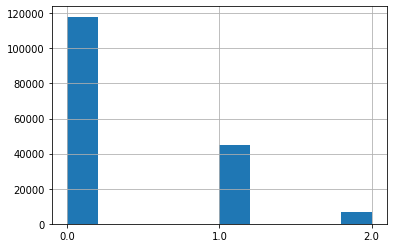

In [49]:
df.engagement.hist()

## Cross-Validation

In [50]:
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
n_splits = 5
kf = StratifiedKFold(n_splits=n_splits) #Stratified because we need balanced samples
kf.get_n_splits(X,np.ravel(y))
df_cv = pd.DataFrame()

for fold, (train_index, test_index) in enumerate(kf.split(X, y),1):
#for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index][:], X.iloc[test_index][:]
    y_train, y_test = y.iloc[train_index][:], y.iloc[test_index][:]
    X_train = scaler.fit_transform (X_train)
    X_test = scaler.transform (X_test)
    sm = SMOTE(k_neighbors = 5, n_jobs = -1)
    X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
    model = RandomForestClassifier (n_jobs = -1, 
            
                bootstrap = True,
                n_estimators = 300,
                oob_score = False,
                random_state = 17)
    model.fit(X_train_oversampled, y_train_oversampled )  
    predictions = model.predict(X_test)
    met = metrics.classification_report(y_test, predictions, digits=3)
    display(HTML('<hr>'))
    print(f'For fold {fold}:')
    print (met)
    
    

For fold 1:
              precision    recall  f1-score   support

         0.0      0.925     0.872     0.898     23605
         1.0      0.673     0.819     0.739      8981
         2.0      0.847     0.463     0.599      1305

    accuracy                          0.842     33891
   macro avg      0.815     0.718     0.745     33891
weighted avg      0.855     0.842     0.844     33891



For fold 2:
              precision    recall  f1-score   support

         0.0      0.925     0.873     0.899     23605
         1.0      0.676     0.815     0.739      8981
         2.0      0.812     0.481     0.604      1305

    accuracy                          0.843     33891
   macro avg      0.805     0.723     0.747     33891
weighted avg      0.855     0.843     0.845     33891



For fold 3:
              precision    recall  f1-score   support

         0.0      0.928     0.886     0.906     23605
         1.0      0.699     0.822     0.756      8980
         2.0      0.854     0.516     0.643      1306

    accuracy                          0.855     33891
   macro avg      0.827     0.741     0.768     33891
weighted avg      0.864     0.855     0.856     33891



For fold 4:
              precision    recall  f1-score   support

         0.0      0.928     0.893     0.910     23604
         1.0      0.710     0.823     0.762      8981
         2.0      0.836     0.496     0.623      1306

    accuracy                          0.859     33891
   macro avg      0.825     0.737     0.765     33891
weighted avg      0.867     0.859     0.860     33891



For fold 5:
              precision    recall  f1-score   support

         0.0      0.935     0.915     0.925     23604
         1.0      0.752     0.836     0.792      8981
         2.0      0.877     0.525     0.657      1305

    accuracy                          0.879     33890
   macro avg      0.855     0.759     0.791     33890
weighted avg      0.884     0.879     0.879     33890



## Create Training and Test Sets

In [14]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

split = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25, random_state = 17)
for train_index, test_index in split.split(X, y):
    X_train = X.iloc[train_index][:]
    X_test = X.iloc[test_index][:]
    y_train = y.iloc[train_index][:]
    y_test = y.iloc[test_index][:]
    
    train_set = df.iloc[train_index][:]
    test_set = df.iloc[test_index][:]
    train_set.to_csv(os.path.join(cn.clean_dir, 'random_forest_time',
            'validation','whole_training_set_20_08_03.csv'), index = False)
    test_set.to_csv(os.path.join(cn.clean_dir, 'random_forest_time', 
            'validation', 'whole_test_set_20_08_03.csv'), index = False)

X_train = scaler.fit_transform (X_train)
X_test = scaler.transform (X_test)

In [15]:
df.head()

,gear_score,time_since_login,2018-01,2019-01,2020-01,2018-02,2019-02,2020-02,2018-03,2019-03,...,2018-10,2019-10,2020-10,2018-11,2019-11,2020-11,2018-12,2019-12,2020-12,engagement
0,437.0,5 days 00:00:00.000000000,5.0,8,3.0,1.0,20.0,4.0,3.0,2.0,...,1.0,0.0,0.0,17,1.0,0.0,2,3.0,0.0,0.0
1,451.0,1 days 00:00:00.000000000,6.0,5,1.0,2.0,18.0,0.0,3.0,2.0,...,4.0,3.0,0.0,16,1.0,0.0,1,3.0,0.0,0.0
2,447.0,-2 days +00:00:00.000000000,6.0,8,1.0,2.0,19.0,0.0,32.0,2.0,...,8.0,6.0,0.0,17,3.0,0.0,3,48.0,0.0,0.0
3,329.0,-2 days +00:00:00.000000000,10.0,5,1.0,2.0,18.0,0.0,9.0,2.0,...,5.0,0.0,0.0,16,2.0,0.0,2,10.0,0.0,0.0
4,268.0,226 days 00:00:00.000000000,1.0,5,1.0,6.0,18.0,0.0,5.0,5.0,...,5.0,1.0,0.0,16,1.0,0.0,4,1.0,0.0,1.0


In [16]:
num_active = train_set[train_set.engagement == '0.0'].shape[0]
print ('Number of active users = ', num_active)
num_at_risk = train_set[train_set.engagement == '1.0'].shape[0]
print ('Number of active users = ', num_at_risk)
num_inactive = train_set[train_set.engagement == '2.0'].shape[0]
print ('Number of active users = ', num_inactive)
num_total = train_set.shape[0]
print ('Number of users total = ', num_total)

print("Percent active = ", num_active/num_total * 100)
print("Percent at-risk = ", num_at_risk/num_total * 100)
print("Percent inactive = ", num_inactive/num_total * 100)

Number of active users =  88517
Number of active users =  33678
Number of active users =  4895
Number of users total =  127090
Percent active =  69.64906758989692
Percent at-risk =  26.499331182626484
Percent inactive =  3.8516012274765914


## Run Model

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors = 10, n_jobs = -1)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
model = RandomForestClassifier (n_jobs = -1,
            
            bootstrap = True,
            n_estimators = 1000,
            oob_score = False,
            random_state = 17)
model.fit(X_train_oversampled, y_train_oversampled)  
predictions = model.predict(X_test)
met = metrics.classification_report(y_test, predictions, digits=3)
display(HTML('<hr>'))
print (met)

              precision    recall  f1-score   support

         0.0      0.928     0.890     0.909     29506
         1.0      0.708     0.817     0.759     11226
         2.0      0.760     0.518     0.616      1632

    accuracy                          0.857     42364
   macro avg      0.799     0.742     0.761     42364
weighted avg      0.864     0.857     0.858     42364



## Make Predictions

In [18]:
predictions = model.predict(X_test)
df_pred = pd.DataFrame(X_test)
df_pred['prediction'] = predictions
df_pred['actual'] = y_test.values
df_pred.to_csv(os.path.join(cn.clean_dir, 
        'random_forest_time','final_time_predictions_demo.csv'), 
        index = False)
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,prediction,actual
0,0.871034,-0.330589,-0.607641,-0.523100,-0.291773,-0.551684,-0.145343,-0.404923,-0.462626,3.209596,...,-0.338197,0.0,-0.490036,-0.481973,0.0,-0.575475,-0.216964,0.0,0.0,0.0
1,1.060679,-0.110761,-0.000591,0.895754,0.327080,-0.144424,0.960203,-0.255007,0.553999,0.103117,...,-0.037279,0.0,-0.124883,-0.358773,0.0,-0.351461,-0.284289,0.0,0.0,0.0
2,-1.120246,-0.110761,-0.540191,-0.582219,-0.360534,-0.551684,-0.436276,-0.329965,-0.535242,0.768791,...,-0.413427,0.0,-0.563066,-0.420373,0.0,-0.500803,-0.418939,0.0,1.0,1.0
3,0.510707,-0.403865,-0.202941,-0.582219,-0.360534,-0.388780,-0.203530,-0.255007,-0.244777,-0.451611,...,-0.338197,0.0,-0.343975,-0.420373,0.0,-0.500803,-0.418939,0.0,0.0,0.0
4,-0.304769,-0.403865,-0.135491,-0.523100,-0.429296,-0.470232,-0.319903,0.569532,-0.462626,-0.562557,...,-0.037279,0.0,0.240269,-0.420373,0.0,-0.500803,-0.486264,0.0,1.0,0.0


## Get accuracy score

In [19]:
print(model.score(X_train,y_train))

0.9998583680856086


## Calculate the confusion matrix

In [20]:
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
print(cnf_matrix)

[[26271  3110   125]
 [ 1908  9176   142]
 [  116   671   845]]


## Print the precision, recall, and accuracy

In [21]:
met = metrics.classification_report(y_test, predictions, digits=3)
folder = os.path.join(cn.clean_dir, 'random_forest_time',)
f_name = 'metrics_time_balanced_metrics.csv'
print(met)

              precision    recall  f1-score   support

         0.0      0.928     0.890     0.909     29506
         1.0      0.708     0.817     0.759     11226
         2.0      0.760     0.518     0.616      1632

    accuracy                          0.857     42364
   macro avg      0.799     0.742     0.761     42364
weighted avg      0.864     0.857     0.858     42364



## Plot the confusion matriix

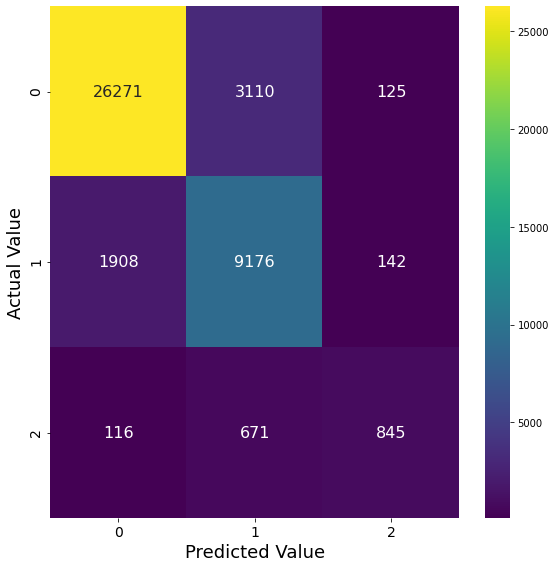

In [22]:
fig2, ax = plt.subplots(figsize = (8,8))
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'viridis', fmt = 'g', annot_kws={"size":16})
ax.set_xlabel ("Predicted Value", fontsize = 18)
ax.set_ylabel ("Actual Value", fontsize = 18)
ax.tick_params (labelsize = 14)
plt.tight_layout()
fig2.savefig(os.path.join(cn.clean_dir, 'random_forest_time','cnfmatrix_time_balanced.png'), dpi=180)

## Save the model

In [23]:
# save the model to disk
pickle_name = 'final_time_model_20_08_03.sav'
os.chdir(os.path.join(cn.clean_dir,'random_forest_time'))
with open(pickle_name, 'wb') as file:
    pickle.dump(model, file)
plt.show()

## Get importances (years-months)

In [24]:
importances = model.feature_importances_
dfp = pd.DataFrame(importances, index = X.columns, 
        columns = ['importance']).sort_values('importance', ascending = False)
display(dfp)

,importance
gear_score,0.191149
2020-05,0.049375
2019-11,0.039674
2020-04,0.038564
2019-12,0.033889
2019-07,0.031143
2020-03,0.030930
2020-01,0.029257
2019-08,0.028793
2018-08,0.028472


#### **Subscriber loyalty is the primary determinant of future engagement.**

Gear score is the most important indicator of whether or not a player will remain engaged. This makes sense because gear score increases continuously throughout an expansion, even if the player is only accomplishing menial tasks instead of achievement-granting tasks. It is also expected that the next three most important features predicting a player's engagement is how often they have been playing in the previous months, as well as their 2-3 year loyalty.

## Repeat the predictions as if the player had completed 1-5 recommended activities in May 2020

In [ ]:
print(df.shape, df_pred.shape)

In [30]:
dfo = pd.read_csv(os.path.join(cn.clean_dir,'random_forest_time',
        'final_time_stats.csv'),dtype = 'unicode')
dfo = dfo.drop_duplicates()
dfo = dfo.fillna(0)
dfo['id'] = dfo.player + '_' + dfo.realm


In [34]:
i = 1

for i in np.arange(0,6):
    if i == 0:
        df['2020-05'] = df['2020-05'].values.astype(float)
    else:
        df['2020-05'] = df['2020-05'].values.astype(float) + 1
    X = scaler.transform(df[recent_cols].drop(['engagement', 'time_since_login'], axis = 1))
    new_pred = model.predict(X)
    dfo['pred' + str(i)] = new_pred


In [38]:
dfo['id'] = dfo.player + '_' + dfo.realm
#dfo = dfo.set_index ('id')
dfo.to_csv(os.path.join(cn.clean_dir, 'random_forest_time',
        'test_predictions2.csv'), index = False)

In [28]:
#df['id'] = dfo.id
#df['status'] = dfo.status
#df['last_login'] = dfo.last_login
#df = df.set_index ('id')
#df.to_csv(os.path.join(cn.clean_dir, 'random_forest_time',
        'test_predictions2.csv'), index = False)

In [42]:
dfo[dfo.pred0 == '1.0'].shape

(29979, 100)

In [ ]:
def update_plot(fig, ax, df_results):
    """ Plots the Maximum Estimated ROI"""
    retained = list()
    sub_cost = 15.99
    test_size = df_results.shape[0]
    for i in np.arange(1,6):
        hyp = df_results[df_results['pred' + str(i)] == '0.0'].index.values
        retained.append(len(hyp))
    y1 = round(retained[0] * sub_cost / 1000,1) #* (100000/test_size)
    y2 = round(retained[1] * sub_cost / 1000,1) # * (100000/test_size)
    y3 = round(retained[2] * sub_cost / 1000,1) # * (100000/test_size)
    y4 = round(retained[3] * sub_cost / 1000,1) # * (100000/test_size)
    y5 = round(retained[4] * sub_cost / 1000,1) # * (100000/test_size)
    ax.bar (x = 1, height = y1, color = 'turquoise', edgecolor = 'dimgray')
    ax.bar (x = 2, height = y2, color = 'skyblue', edgecolor = 'dimgray')
    ax.bar (x = 3, height = y3, color = 'mediumpurple', edgecolor = 'dimgray')
    ax.bar (x = 4, height = y4, color = 'plum', edgecolor = 'dimgray')
    ax.bar (x = 5, height = y5, color = 'salmon', edgecolor = 'dimgray')
    ax.annotate('$' + str(y1)[:4] + 'k', xy=(0.75, y1 + y1 * 0.02), fontsize = 12)
    ax.annotate('$' + str(y2)[:4] + 'k', xy=(1.75, y2 + y2 * 0.02), fontsize = 12)
    ax.annotate('$' + str(y3)[:4] + 'k', xy=(2.75, y3 + y3 * 0.02), fontsize = 12)
    ax.annotate('$' + str(y4)[:4] + 'k', xy=(3.75, y4 + y4 * 0.02), fontsize = 12)
    ax.annotate('$' + str(y5)[:4] + 'k', xy=(4.75, y5 + y5 * 0.02), fontsize = 12)
    ax.tick_params(labelsize = 12)
    ax.set_xlim(0.5, 5.5)
    ax.set_ylim(0,y5 + y5 *0.5)
    ax.set_ylabel('Estimated Monthly Revenue Recovered \n (per 100,000 players) \n', fontsize = 12)
    ax.set_xlabel('\n Additional Content Completed', fontsize = 12)
    plt.tight_layout()
    #main_bottom.pyplot()
    return retained

In [ ]:
fig, ax = plt.subplots()
retained = update_plot(fig, ax, df[df.pred0 == '1.0'])
percent_recovery = []
sample_size = df[df.pred0 == '1.0'].shape[0]
print('sample size = {}'.format(sample_size))
for i in np.arange(0,5):
    print(retained[i])
    percent_recovery.append(round(100*(retained[i])/sample_size,1))
print('Estimated Conversion from At-Risk to Active Status: ')
print('1 additional activity: ' + str(percent_recovery[0]) + '%')
print('2 additional activities: ' + str(percent_recovery[1])+ '%')
print('3 additional activities: ' + str(percent_recovery[2])+ '%')
print('4 additional activities: '+ str(percent_recovery[3])+ '%')
print('5 additional activities: '+ str(percent_recovery[4])+ '%')
